## Observations and Insights 

In [1]:
#Observations

#Based on the bar charts, Capomulin and Ramican are the regimens used the most to treat mice
#Looking at the pie charts, it seems the mice population is equally divided between female and male mice
#In the scatter plot, one can see a strong positive relation between a mouse's weight and the average tumor weight 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results,mouse_metadata, how="left",on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_df.loc[combined_df["Mouse ID"] == "g989"]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice)==False]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
new_data = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
Mean = new_data.mean()
Median = new_data.median()
Variance = new_data.var()
STD = new_data.std()
SEM = new_data.sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.

statistics_df = pd.DataFrame({"Mean": Mean,
                             "Median": Median,
                             "Variance": Variance,
                             "Standard Deviation": STD,
                             "SEM": SEM})
statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
new_stats_df = statistics_df.describe()
new_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,50.975982,49.902123,47.858440,6.821103,0.502785
std,5.621289,4.705415,16.008423,1.216096,0.103473
min,40.216745,40.673236,23.486704,4.846308,0.320955
25%,52.388490,50.778739,40.249804,6.342952,0.475424
50%,53.060651,51.819532,46.192684,6.794337,0.530365
75%,54.183257,52.396036,60.738703,7.793357,0.579276
max,55.235638,53.698743,68.553577,8.279709,0.603860


## Bar and Pie Charts

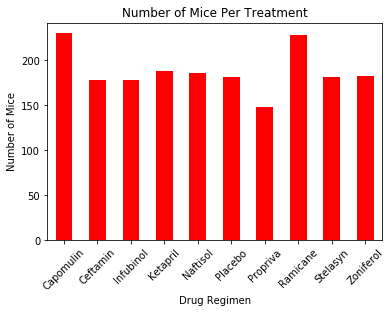

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_treatment = cleaned_df.groupby("Drug Regimen")["Timepoint"].count()
mice_treatment.plot(kind="bar",color="red")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Per Treatment")
plt.xticks(rotation=45)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

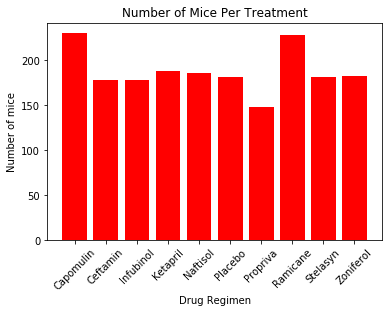

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
new_x_axis = mice_treatment.index.tolist()
x_axis = new_x_axis
y_axis = mice_treatment 
plt.bar(x_axis,y_axis,color="red",align="center")
plt.ylabel("Number of mice")
plt.xlabel("Drug Regimen")
plt.title("Number of Mice Per Treatment")
plt.xticks(rotation=45)

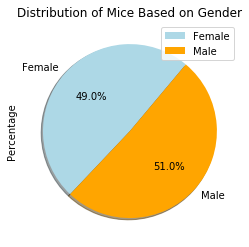

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = cleaned_df.groupby("Sex").count()
grouped_by_gender = gender_df[["Mouse ID"]]
grouped_by_gender = grouped_by_gender.rename(columns={"Mouse ID": "Percentage"})
grouped_by_gender
colors = ["lightblue","orange"]
grouped_by_gender.plot.pie(y="Percentage",colors=colors,startangle=50
                           ,shadow=True,autopct="%1.1f%%")
plt.title("Distribution of Mice Based on Gender")
plt.show()

/Users/juanferc/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


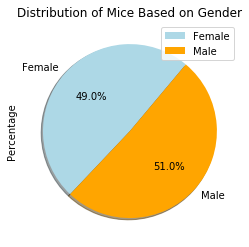

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
new_count_df = grouped_by_gender
plt.pie(new_count_df,labels=labels,colors=colors,startangle=50
                           ,shadow=True,autopct="%1.1f%%")
plt.legend(labels,loc="upper right")
plt.title("Distribution of Mice Based on Gender")
plt.ylabel("Percentage")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = cleaned_df[["Mouse ID","Timepoint","Drug Regimen"]]
new_cleaned_df = timepoint_df[timepoint_df["Drug Regimen"].isin(treatments)]
group_df = new_cleaned_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(group_df,cleaned_df,on=["Mouse ID","Timepoint"],how="left")
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [15]:
cap_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin",:]
ram_df = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane", :]
inf_df = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol", :]
ceft_df = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin", :]

new_cap_df = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_vol = pd.DataFrame(new_cap_df)
cap_merged = pd.merge(cap_vol, merged_df, on=("Mouse ID","Timepoint"),how="left")

volume = cap_merged["Tumor Volume (mm3)"]
quartiles = volume.quantile([.25,.5,.75])

lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
median = quartiles[0.5]
iqr = upper_q - lower_q

new_lower = round(lower_q,6)
new_upper = round(upper_q,6)
new_iqr = round(iqr,6)

lower_limit = lower_q - (1.5*iqr)
upper_limit = upper_q + (1.5*iqr)
new_lowerl = round(lower_limit,6)
new_upperl = round(upper_limit,6)

print("Capomulin outliers could be values below " + str(new_lowerl) + " and above " + str(new_upperl) + " could be outliers")

Capomulin outliers could be values below 20.704562 and above 51.832015 could be outliers


In [16]:
new_ram_df = ram_df.groupby("Mouse ID").max()["Timepoint"]
ram_vol = pd.DataFrame(new_ram_df)
ram_merged = pd.merge(ram_vol, merged_df, on=("Mouse ID","Timepoint"),how="left")

volume2 = ram_merged["Tumor Volume (mm3)"]
quartiles = volume2.quantile([.25,.5,.75])

lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
median = quartiles[0.5]
iqr = upper_q - lower_q

new_lower = round(lower_q,6)
new_upper = round(upper_q,6)
new_iqr = round(iqr,6)

lower_limit = lower_q - (1.5*iqr)
upper_limit = upper_q + (1.5*iqr)
new_lowerl = round(lower_limit,6)
new_upperl = round(upper_limit,6)

print("Ramicane outliers could be values below " + str(new_lowerl) + " and above " + str(new_upperl) + " could be outliers")

Ramicane outliers could be values below 17.912664 and above 54.306811 could be outliers


In [17]:
new_inf_df = inf_df.groupby("Mouse ID").max()["Timepoint"]
inf_vol = pd.DataFrame(new_inf_df)
inf_merged = pd.merge(inf_vol, merged_df, on=("Mouse ID","Timepoint"),how="left")

volume3 = inf_merged["Tumor Volume (mm3)"]
quartiles = volume3.quantile([.25,.5,.75])

lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
median = quartiles[0.5]
iqr = upper_q - lower_q

new_lower = round(lower_q,6)
new_upper = round(upper_q,6)
new_iqr = round(iqr,6)

lower_limit = lower_q - (1.5*iqr)
upper_limit = upper_q + (1.5*iqr)
new_lowerl = round(lower_limit,6)
new_upperl = round(upper_limit,6)

print("Infubinol outliers could be values below " + str(new_lowerl) + " and above " + str(new_upperl) + " could be outliers")


Infubinol outliers could be values below 36.832905 and above 82.741446 could be outliers


In [18]:
new_ceft_df = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceft_vol = pd.DataFrame(new_ceft_df)
ceft_merged = pd.merge(ceft_vol, merged_df, on=("Mouse ID","Timepoint"),how="left")

volume4 = ceft_merged["Tumor Volume (mm3)"]
quartiles = volume4.quantile([.25,.5,.75])

lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
median = quartiles[0.5]
iqr = upper_q - lower_q

new_lower = round(lower_q,6)
new_upper = round(upper_q,6)
new_iqr = round(iqr,6)

lower_limit = lower_q - (1.5*iqr)
upper_limit = upper_q + (1.5*iqr)
new_lowerl = round(lower_limit,6)
new_upperl = round(upper_limit,6)

print("Ceftamin outliers could be values below " + str(new_lowerl) + " and above " + str(new_upperl) + " could be outliers")

Ceftamin outliers could be values below 25.35545 and above 87.666458 could be outliers


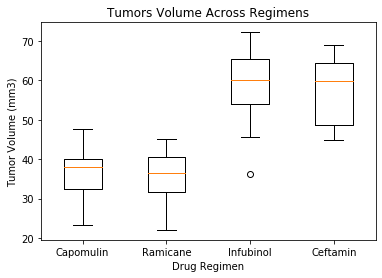

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_data = [volume,volume2,volume3,volume4]

fig, plot = plt.subplots()
plot.set_title("Tumors Volume Across Regimens")
plot.set_ylabel("Tumor Volume (mm3)")
plot.set_xlabel("Drug Regimen")

plot.boxplot(boxplot_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

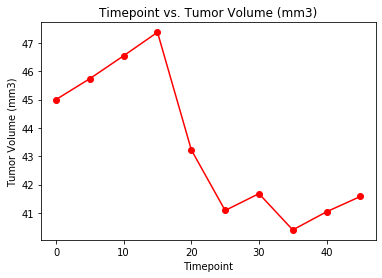

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = combined_df.loc[combined_df["Drug Regimen"]=="Capomulin"]
mouse_id = capomulin_df.loc[capomulin_df["Mouse ID"] == "r944"]

line_df = mouse_id[["Timepoint", "Tumor Volume (mm3)"]]
line_plot = line_df.plot(kind="line",x="Timepoint",y="Tumor Volume (mm3)",legend=False,title="Timepoint vs. Tumor Volume (mm3)",marker="o",color="r")
line_plot.set_xlabel("Timepoint")
line_plot.set_ylabel("Tumor Volume (mm3)")


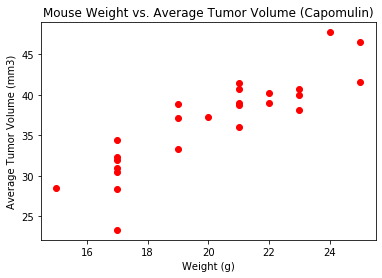

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plot_df = cap_df.groupby(["Mouse ID"]).mean()
plt.scatter(plot_df["Weight (g)"],plot_df["Tumor Volume (mm3)"],color="r")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(plot_df["Weight (g)"],plot_df["Tumor Volume (mm3)"])[0],2)
print("The correlation between mouse weight and average tumor volume is: " + str(correlation))

The correlation between mouse weight and average tumor volume is: 0.88


In [23]:
data = st.linregress(plot_df["Weight (g)"],plot_df["Tumor Volume (mm3)"])
data

LinregressResult(slope=1.750468228958504, intercept=1.4481469525549002, rvalue=0.8767060403658119, pvalue=9.0844290886732e-09, stderr=0.20026513236453639)

In [24]:
slope = 1.750468228958504
intercept = 1.4481469525549002

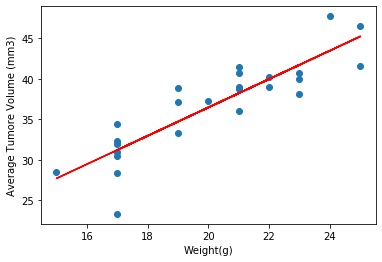

In [25]:
y_values = plot_df["Weight (g)"] * slope + intercept
plt.scatter(plot_df["Weight (g)"],plot_df["Tumor Volume (mm3)"])
plt.plot(plot_df["Weight (g)"], y_values, color="r")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumore Volume (mm3)")
plt.show()